<a href="https://colab.research.google.com/github/kushalk20/Deep-Learning/blob/main/mobile_price.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
# 1.0 Call libraries
import pandas as pd
import numpy as np
from  pathlib import Path

# 1.0.1
import tensorflow as tf
from tensorflow import keras
from tensorflow.keras import layers

In [2]:
# 1.1 Display multiple commands output from a cell
from IPython.core.interactiveshell import InteractiveShell
InteractiveShell.ast_node_interactivity = "all"

In [8]:
# 2.0
from google.colab import drive
drive.mount('/gdrive')

Drive already mounted at /gdrive; to attempt to forcibly remount, call drive.mount("/gdrive", force_remount=True).


In [9]:
# 2.1 Where is our data file:
pathToFolder = "/gdrive/MyDrive/Deep Learning"

In [10]:
 #2.2 Full file path:
path = Path(pathToFolder) / "mobile_price.csv"

In [11]:
path

PosixPath('/gdrive/MyDrive/Deep Learning/mobile_price.csv')

In [12]:
mobile_price = pd.read_csv(path)

In [13]:
mobile_price.head()

,battery_power,blue,clock_speed,dual_sim,fc,four_g,int_memory,m_dep,mobile_wt,n_cores,...,px_height,px_width,ram,sc_h,sc_w,talk_time,three_g,touch_screen,wifi,price_range
0,842,0,2.2,0,1,0,7,0.6,188,2,...,20,756,2549,9,7,19,0,0,1,1
1,1021,1,0.5,1,0,1,53,0.7,136,3,...,905,1988,2631,17,3,7,1,1,0,2
2,563,1,0.5,1,2,1,41,0.9,145,5,...,1263,1716,2603,11,2,9,1,1,0,2
3,615,1,2.5,0,0,0,10,0.8,131,6,...,1216,1786,2769,16,8,11,1,0,0,2
4,1821,1,1.2,0,13,1,44,0.6,141,2,...,1208,1212,1411,8,2,15,1,1,0,1


In [15]:
mobile_price.shape
mobile_price.dtypes

(2000, 21)

battery_power      int64
blue               int64
clock_speed      float64
dual_sim           int64
fc                 int64
four_g             int64
int_memory         int64
m_dep            float64
mobile_wt          int64
n_cores            int64
pc                 int64
px_height          int64
px_width           int64
ram                int64
sc_h               int64
sc_w               int64
talk_time          int64
three_g            int64
touch_screen       int64
wifi               int64
price_range        int64
dtype: object

In [16]:
# 3.2 Get target and predictors:
y = mobile_price.pop("ram")
X = mobile_price

In [23]:
# 4.0 Build model:
# It is Sequential in the sense as there is sequence of layers...First is Input layer..Then is hidden layer...Output layers..
model = tf.keras.Sequential()

In [24]:
# 4.1 First/Input layer wants to know how many features are there is X.. AS uske basis no. of neurons decide hongey
model.add(layers.Input( shape = (X.shape[1],) ) )

In [22]:
# Adding Hidden Layers
model.add(layers.Dense(8,activation='relu'))

In [25]:
model.add(layers.Dense(16,activation='relu'))

In [26]:
model.add(layers.Dense(8,activation='relu'))

In [27]:
model.compile( loss = "mae")

In [29]:
model.fit(X,y, epochs = 500 )

Epoch 1/500
63/63 [==============================] - 0s 5ms/step - loss: 926.5005
Epoch 2/500
63/63 [==============================] - 0s 3ms/step - loss: 927.1704
Epoch 3/500
63/63 [==============================] - 0s 2ms/step - loss: 925.7109
Epoch 4/500
63/63 [==============================] - 0s 2ms/step - loss: 925.0164
Epoch 5/500
63/63 [==============================] - 0s 2ms/step - loss: 924.2617
Epoch 6/500
63/63 [==============================] - 0s 2ms/step - loss: 923.6406
Epoch 7/500
63/63 [==============================] - 0s 2ms/step - loss: 922.2988
Epoch 8/500
63/63 [==============================] - 0s 2ms/step - loss: 922.6661
Epoch 9/500
63/63 [==============================] - 0s 2ms/step - loss: 921.7584
Epoch 10/500
63/63 [==============================] - 0s 2ms/step - loss: 921.1717
Epoch 11/500
63/63 [==============================] - 0s 2ms/step - loss: 920.9141
Epoch 12/500
63/63 [==============================] - 0s 2ms/step - loss: 919.0602
Epoch 13/500


In [30]:
from tensorflow.keras.utils import plot_model

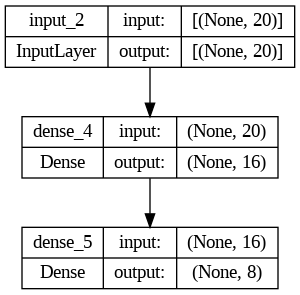

In [31]:
plot_model(model, show_shapes=True)

In [33]:
# In first layer 20 Inputs are coming in and 20 are going out... In the second layer 20 are coming in but
# only 16 are going out cause there are only 16 neurons & in the third layer 16 are coming but 8 are going out
# cause there are 8 neurons in the third layer.

In [ ]:
#Assignment, use any activation function... free to choose no. of neurons... experiment with both MAE & MSE..
# Use this dataset only but predict mobile_weight